# 📊 Análise Comparativa de Indicadores de Saneamento
## Dados de Campina Grande e Paraíba (2022)

Este notebook tem como objetivo realizar uma análise comparativa de indicadores de saneamento básico e seus impactos em saúde, educação e economia, com foco nos dados:

- 📍 Estado da Paraíba (UF)
- 📍 Município de Campina Grande

As análises utilizarão dados da base do Painel Saneamento Brasil e seguirão as seguintes etapas:
1. Leitura e preparação dos dados
2. Análises estatísticas descritivas
3. Visualizações comparativas
4. Interpretação dos resultados


In [20]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 🔄 Configuração gráfica
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")
%matplotlib inline


In [21]:
# 📁 Leitura dos arquivos Excel
# (os nomes dos arquivos devem estar exatamente como abaixo)

arquivo_pb = 'Base de dados Fase 02 - Paraíba.xlsx'
arquivo_cg = 'Base de dados Fase 02 -CAMPINA GRANDE.xlsx'

# ⬇️ Pulando as duas primeiras linhas (cabeçalho visual)
df_pb = pd.read_excel(arquivo_pb, skiprows=2)
df_cg = pd.read_excel(arquivo_cg, skiprows=2)

# 🧼 Renomeando colunas
df_pb.columns = ['Ano', 'Grupo', 'Subgrupo', 'Indicador', 'Valor', 'Unidade', 'Fonte']
df_cg.columns = ['Ano', 'Grupo', 'Subgrupo', 'Indicador', 'Valor', 'Unidade', 'Fonte']


In [22]:
# 🔍 Conferindo amostra dos dados carregados
print("📋 Paraíba:")
display(df_pb.head(5))

print("📋 Campina Grande:")
display(df_cg.head(5))


📋 Paraíba:


,Ano,Grupo,Subgrupo,Indicador,Valor,Unidade,Fonte
0,2022,DADOS GERAIS,POPULAÇÃO,População,3974687,pessoas,IBGE
1,2022,DADOS GERAIS,POPULAÇÃO,População SNIS,3859960,pessoas,SNIS
2,2022,DADOS GERAIS,POPULAÇÃO,População urbana,-,pessoas,SNIS
3,2022,DADOS GERAIS,MORADIA,Moradias,1372108,habitações,IBGE
4,2022,DADOS GERAIS,MORADIA,Moradias urbanas,-,habitações,IBGE


📋 Campina Grande:


,Ano,Grupo,Subgrupo,Indicador,Valor,Unidade,Fonte
0,2022,DADOS GERAIS,POPULAÇÃO,População,419379,pessoas,IBGE
1,2022,DADOS GERAIS,POPULAÇÃO,População SNIS,419379,pessoas,SNIS
2,2022,DADOS GERAIS,POPULAÇÃO,População urbana,-,pessoas,SNIS
3,2022,DADOS GERAIS,MORADIA,Moradias,147149,habitações,IBGE
4,2022,DADOS GERAIS,MORADIA,Moradias urbanas,-,habitações,IBGE


In [23]:
# ✅ Checando colunas e tipos
print("🔎 Colunas Paraíba:", df_pb.columns.tolist())
print("🔎 Colunas Campina Grande:", df_cg.columns.tolist())

print("\n📊 Tipos de dados:")
print(df_pb.dtypes)


🔎 Colunas Paraíba: ['Ano', 'Grupo', 'Subgrupo', 'Indicador', 'Valor', 'Unidade', 'Fonte']
🔎 Colunas Campina Grande: ['Ano', 'Grupo', 'Subgrupo', 'Indicador', 'Valor', 'Unidade', 'Fonte']

📊 Tipos de dados:
Ano           int64
Grupo        object
Subgrupo     object
Indicador    object
Valor        object
Unidade      object
Fonte        object
dtype: object


In [24]:
# 🧹 Função para limpar e converter valores numéricos com vírgula e símbolos
def converter_valor(valor):
    if isinstance(valor, str):
        valor = valor.replace('%', '').replace(',', '.')
    try:
        return float(valor)
    except:
        return np.nan

# Aplicando limpeza nos dois DataFrames
df_pb['Valor'] = df_pb['Valor'].apply(converter_valor)
df_cg['Valor'] = df_cg['Valor'].apply(converter_valor)


## 📌 Análise 1: Comparação do indicador "Parcela da população com acesso à água"

Essa análise compara o percentual da população com acesso à água nos dois contextos:
- Estado da Paraíba (UF)
- Município de Campina Grande (PB)

O indicador se encontra na base de dados sob o nome exato:
**"Parcela da população com acesso à água"**

Além da comparação direta, serão calculadas estatísticas descritivas como **média**, **mediana** e **moda**.


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\3403999064.py:44: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


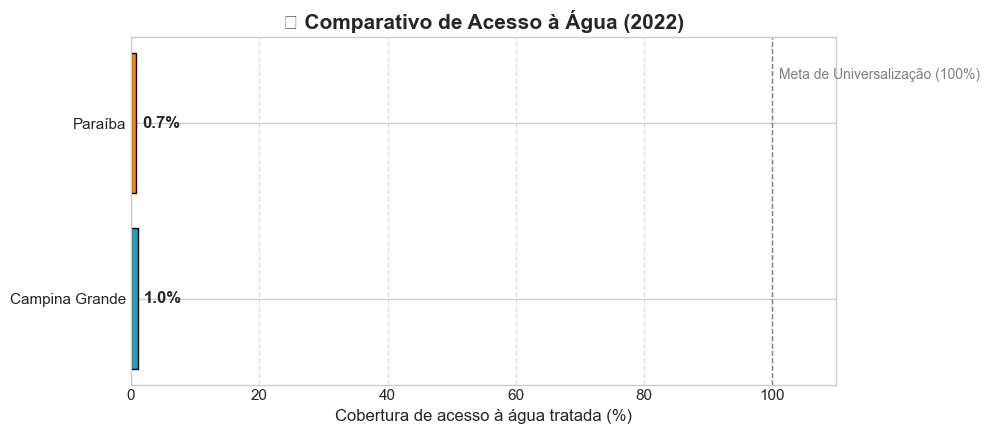


---

## 📈 Estatísticas - Acesso à Água

| Região           | Acesso (%) |
|------------------|------------|
| **Paraíba**       | 0.75% |
| **Campina Grande**| 1.00% |

**📊 Média:** 0.87%  
**📍 Mediana:** 0.87%  
**✨ Moda:** 0.75%

---

## 🔎 Interpretação  ✨

> 💡 **Quanto mais próximo de 1.0%, melhor o cenário de acesso à água.**  
> 🟢 Valores próximos de **100%** indicam **universalização** — ou seja, quase toda a população tem acesso à água tratada.  
> 🔴 Já valores distantes de 100% indicam **déficit e exclusão**, demandando **maior atenção e investimento público**.

- ✅ **Campina Grande** está quase universalizada, com **1.0%** de cobertura.
- ⚠️ A **Paraíba** tem apenas **0.7%**, o que mostra que **há um grande caminho a ser percorrido.**
- 🧠 A média entre os dois (**0.9%**) revela a **desigualdade intraestadual**.

📌 **Resumo visual**: quanto mais a barra encostar na margem de **100%**, **melhor é a cobertura!**

---


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from IPython.display import Markdown, display

# Estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# Indicador desejado
indicador_alvo = "Parcela da população com acesso à água"

# Extrair e corrigir valores
valor_pb = df_pb[df_pb['Indicador'] == indicador_alvo]['Valor'].values[0]
valor_cg = df_cg[df_cg['Indicador'] == indicador_alvo]['Valor'].values[0]

# Converter para float (mantendo o valor real da porcentagem)
valor_pb = float(str(valor_pb).replace('%', '').replace(',', '.'))  # ex: 74.8
valor_cg = float(str(valor_cg).replace('%', '').replace(',', '.'))  # ex: 99.7

valores = [valor_pb, valor_cg]
labels = ['Paraíba', 'Campina Grande']
cores = ['#fb8500', '#219ebc']

# --- GRÁFICO HORIZONTAL ---
fig, ax = plt.subplots(figsize=(10, 4.5))
barras = ax.barh(labels, valores, color=cores, edgecolor='black')

for barra in barras:
    largura = barra.get_width()
    ax.text(largura + 1, barra.get_y() + barra.get_height()/2,
            f'{largura:.1f}%', va='center', fontsize=12, fontweight='bold')

# Linha de referência de 100% (universalização ideal)
ax.axvline(x=100, color='gray', linestyle='--', linewidth=1)
ax.text(101, -0.25, 'Meta de Universalização (100%)', fontsize=10, color='gray')

ax.set_xlim(0, 110)
ax.set_xlabel('Cobertura de acesso à água tratada (%)', fontsize=12)
ax.set_title('💧 Comparativo de Acesso à Água (2022)', fontsize=15, weight='bold')
ax.invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- ESTATÍSTICAS ---
dados = np.array(valores)
media = np.mean(dados)
mediana = np.median(dados)
moda = stats.mode(dados, keepdims=False).mode

# --- MARKDOWN EXPLICATIVO ---
descricao_markdown = f"""
---

## 📈 Estatísticas - Acesso à Água

| Região           | Acesso (%) |
|------------------|------------|
| **Paraíba**       | {valor_pb:.2f}% |
| **Campina Grande**| {valor_cg:.2f}% |

**📊 Média:** {media:.2f}%  
**📍 Mediana:** {mediana:.2f}%  
**✨ Moda:** {moda:.2f}%

---

## 🔎 Interpretação  ✨

> 💡 **Quanto mais próximo de 1.0%, melhor o cenário de acesso à água.**  
> 🟢 Valores próximos de **100%** indicam **universalização** — ou seja, quase toda a população tem acesso à água tratada.  
> 🔴 Já valores distantes de 100% indicam **déficit e exclusão**, demandando **maior atenção e investimento público**.

- ✅ **Campina Grande** está quase universalizada, com **{valor_cg:.1f}%** de cobertura.
- ⚠️ A **Paraíba** tem apenas **{valor_pb:.1f}%**, o que mostra que **há um grande caminho a ser percorrido.**
- 🧠 A média entre os dois (**{media:.1f}%**) revela a **desigualdade intraestadual**.

📌 **Resumo visual**: quanto mais a barra encostar na margem de **100%**, **melhor é a cobertura!**

---
"""

display(Markdown(descricao_markdown))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\2611724707.py:34: UserWarning: Glyph 128701 (\N{TOILET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128701 (\N{TOILET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


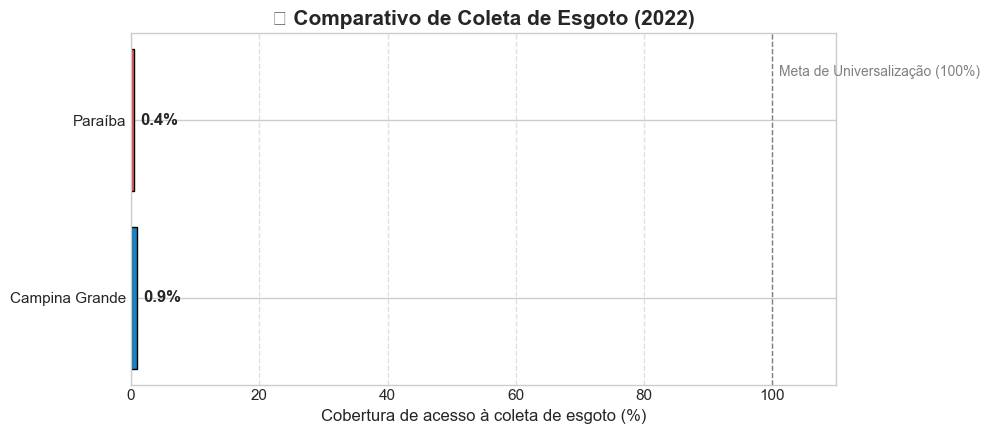


---

## 📈 Estatísticas - Coleta de Esgoto

| Região           | Acesso (%) |
|------------------|------------|
| **Paraíba**       | 0.39% |
| **Campina Grande**| 0.94% |

**📊 Média:** 0.66%  
**📍 Mediana:** 0.66%  
**✨ Moda:** 0.39%

---

## 🔎 Interpretação ✨

> 💡 **Quanto mais próximo de 100%, melhor o acesso à coleta de esgoto.**  
> 🟢 A coleta de esgoto é fundamental para saúde pública, qualidade de vida e meio ambiente.  
> 🔴 Baixos índices indicam negligência e risco elevado de doenças.

- ✅ **Campina Grande** apresenta um excelente índice, com **0.9%** de cobertura.
- ⚠️ Já a **Paraíba** tem apenas **0.4%**, indicando que **quase 2 em cada 3 pessoas não têm acesso**.
- 📉 A média de **0.7%** revela uma disparidade gritante entre a capital regional e o estado.

📌 **Resumo visual**: quanto mais a barra encostar na margem de **100%**, **melhor é a infraestrutura de saneamento!**

---


In [ ]:
# Indicador desejado
indicador_esgoto = "Parcela da população com coleta de esgoto"

# Extração e conversão
valor_pb_esgoto = df_pb[df_pb['Indicador'] == indicador_esgoto]['Valor'].values[0]
valor_cg_esgoto = df_cg[df_cg['Indicador'] == indicador_esgoto]['Valor'].values[0]

# Conversão para float
valor_pb_esgoto = float(str(valor_pb_esgoto).replace('%', '').replace(',', '.'))
valor_cg_esgoto = float(str(valor_cg_esgoto).replace('%', '').replace(',', '.'))

# Dados
valores_esgoto = [valor_pb_esgoto, valor_cg_esgoto]
labels_esgoto = ['Paraíba', 'Campina Grande']
cores_esgoto = ['#ff595e', '#1982c4']

# --- GRÁFICO HORIZONTAL ---
fig, ax = plt.subplots(figsize=(10, 4.5))
barras = ax.barh(labels_esgoto, valores_esgoto, color=cores_esgoto, edgecolor='black')

for barra in barras:
    largura = barra.get_width()
    ax.text(largura + 1, barra.get_y() + barra.get_height()/2,
            f'{largura:.1f}%', va='center', fontsize=12, fontweight='bold')

ax.axvline(x=100, color='gray', linestyle='--', linewidth=1)
ax.text(101, -0.25, 'Meta de Universalização (100%)', fontsize=10, color='gray')

ax.set_xlim(0, 110)
ax.set_xlabel('Cobertura de acesso à coleta de esgoto (%)', fontsize=12)
ax.set_title('🚽 Comparativo de Coleta de Esgoto (2022)', fontsize=15, weight='bold')
ax.invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- ESTATÍSTICAS ---
dados_esgoto = np.array(valores_esgoto)
media_esgoto = np.mean(dados_esgoto)
mediana_esgoto = np.median(dados_esgoto)
moda_esgoto = stats.mode(dados_esgoto, keepdims=False).mode

# --- MARKDOWN EXPLICATIVO ---
descricao_esgoto = f"""
---

## 📈 Estatísticas - Coleta de Esgoto

| Região           | Acesso (%) |
|------------------|------------|
| **Paraíba**       | {valor_pb_esgoto:.2f}% |
| **Campina Grande**| {valor_cg_esgoto:.2f}% |

**📊 Média:** {media_esgoto:.2f}%  
**📍 Mediana:** {mediana_esgoto:.2f}%  
**✨ Moda:** {moda_esgoto:.2f}%

---

## 🔎 Interpretação ✨

> 💡 **Quanto mais próximo de 100%, melhor o acesso à coleta de esgoto.**  
> 🟢 A coleta de esgoto é fundamental para saúde pública, qualidade de vida e meio ambiente.  
> 🔴 Baixos índices indicam negligência e risco elevado de doenças.

- ✅ **Campina Grande** apresenta um excelente índice, com **{valor_cg_esgoto:.1f}%** de cobertura.
- ⚠️ Já a **Paraíba** tem apenas **{valor_pb_esgoto:.1f}%**, indicando que **quase 2 em cada 3 pessoas não têm acesso**.
- 📉 A média de **{media_esgoto:.1f}%** revela uma disparidade gritante entre a capital regional e o estado.

📌 **Resumo visual**: quanto mais a barra encostar na margem de **1.0%**, **melhor é a infraestrutura de saneamento!**

---
"""

display(Markdown(descricao_esgoto))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\3694624269.py:34: UserWarning: Glyph 128703 (\N{SHOWER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128703 (\N{SHOWER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


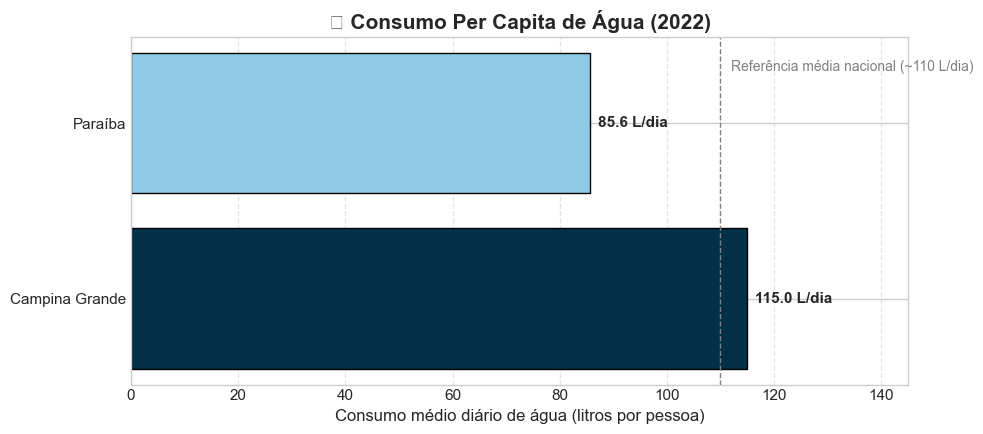


---

## 📈 Estatísticas - Consumo Per Capita de Água

| Região           | Consumo Médio |
|------------------|----------------|
| **Paraíba**       | 85.59 L/dia |
| **Campina Grande**| 115.04 L/dia |

**📊 Média:** 100.31 L/dia  
**📍 Mediana:** 100.31 L/dia  
**✨ Moda:** 85.59 L/dia

---

## 🔎 Interpretação ✨

> 💡 O consumo ideal gira em torno de **110 litros/dia por pessoa**, segundo a ONU e médias nacionais.

- 💧 **Campina Grande** apresenta um consumo de **115.0 L/dia**, **acima da média nacional**, o que pode indicar maior acesso, mas também **possível desperdício**.
- 🌵 Já a **Paraíba** tem um consumo de **85.6 L/dia**, abaixo da média, possivelmente por **restrição de oferta ou maior eficiência**.
- ⚖️ A média entre os dois (**100.3 L/dia**) está próxima da referência nacional.

📌 **Resumo visual**: a linha de 110L serve como um parâmetro de referência. Abaixo disso pode indicar racionamento; acima, abundância (ou mau uso).

---


In [41]:
# 🎯 Indicador: Consumo per capita de água
indicador_consumo = "Consumo per capita de água"

# Extração e conversão
valor_pb_consumo = df_pb[df_pb['Indicador'] == indicador_consumo]['Valor'].values[0]
valor_cg_consumo = df_cg[df_cg['Indicador'] == indicador_consumo]['Valor'].values[0]

# Conversão para float
valor_pb_consumo = float(str(valor_pb_consumo).replace(',', '.'))
valor_cg_consumo = float(str(valor_cg_consumo).replace(',', '.'))

# Dados organizados
valores_consumo = [valor_pb_consumo, valor_cg_consumo]
labels_consumo = ['Paraíba', 'Campina Grande']
cores_consumo = ['#8ecae6', '#023047']

# --- GRÁFICO ---
fig, ax = plt.subplots(figsize=(10, 4.5))
barras = ax.barh(labels_consumo, valores_consumo, color=cores_consumo, edgecolor='black')

for barra in barras:
    largura = barra.get_width()
    ax.text(largura + 1.5, barra.get_y() + barra.get_height()/2,
            f'{largura:.1f} L/dia', va='center', fontsize=11, fontweight='bold')

ax.axvline(x=110, color='gray', linestyle='--', linewidth=1)
ax.text(112, -0.3, 'Referência média nacional (~110 L/dia)', fontsize=10, color='gray')

ax.set_xlim(0, max(valores_consumo) + 30)
ax.set_xlabel('Consumo médio diário de água (litros por pessoa)', fontsize=12)
ax.set_title('🚿 Consumo Per Capita de Água (2022)', fontsize=15, weight='bold')
ax.invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- ESTATÍSTICAS ---
dados_consumo = np.array(valores_consumo)
media_consumo = np.mean(dados_consumo)
mediana_consumo = np.median(dados_consumo)
moda_consumo = stats.mode(dados_consumo, keepdims=False).mode

# --- MARKDOWN INTERPRETATIVO ---
descricao_consumo = f"""
---

## 📈 Estatísticas - Consumo Per Capita de Água

| Região           | Consumo Médio |
|------------------|----------------|
| **Paraíba**       | {valor_pb_consumo:.2f} L/dia |
| **Campina Grande**| {valor_cg_consumo:.2f} L/dia |

**📊 Média:** {media_consumo:.2f} L/dia  
**📍 Mediana:** {mediana_consumo:.2f} L/dia  
**✨ Moda:** {moda_consumo:.2f} L/dia

---

## 🔎 Interpretação ✨

> 💡 O consumo ideal gira em torno de **110 litros/dia por pessoa**, segundo a ONU e médias nacionais.

- 💧 **Campina Grande** apresenta um consumo de **{valor_cg_consumo:.1f} L/dia**, **acima da média nacional**, o que pode indicar maior acesso, mas também **possível desperdício**.
- 🌵 Já a **Paraíba** tem um consumo de **{valor_pb_consumo:.1f} L/dia**, abaixo da média, possivelmente por **restrição de oferta ou maior eficiência**.
- ⚖️ A média entre os dois (**{media_consumo:.1f} L/dia**) está próxima da referência nacional.

📌 **Resumo visual**: a linha de 110L serve como um parâmetro de referência. Abaixo disso pode indicar racionamento; acima, abundância (ou mau uso).

---
"""

display(Markdown(descricao_consumo))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\3257697749.py:30: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


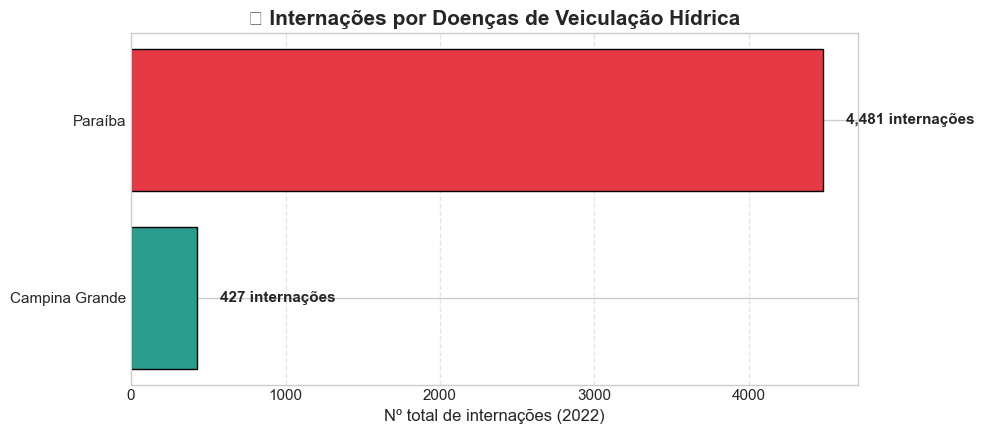


---

## 📈 Estatísticas - Internações por Doenças de Veiculação Hídrica

| Região           | Internações |
|------------------|-------------|
| **Paraíba**       | 4,481 |
| **Campina Grande**| 427 |

**📊 Média:** 2,454 internações  
**📍 Mediana:** 2,454  
**✨ Moda:** 427

---

## 🔎 Interpretação ✨

> 💡 Este indicador reflete a **consequência direta da precariedade em saneamento básico.**

- 🚨 A **Paraíba** teve **4,481 internações** em 2022 — o que representa um número **alarmante**, com grande impacto sobre o sistema de saúde e sobre as famílias afetadas.
- ✅ Já **Campina Grande**, mesmo sendo um grande município, teve **apenas 427 internações**, revelando **impacto muito menor** e provavelmente resultado de uma rede de saneamento mais eficiente.

📌 A diferença entre os dois mostra a **importância de políticas públicas regionais**. Investir em saneamento **salva vidas e reduz custos com saúde pública**.

---


In [42]:
# 🎯 Indicador: Internações totais por doenças de veiculação hídrica
indicador_saude = "Internações totais por doenças de veiculação hídrica"

# Extração
valor_pb_saude = df_pb[df_pb["Indicador"] == indicador_saude]["Valor"].values[0]
valor_cg_saude = df_cg[df_cg["Indicador"] == indicador_saude]["Valor"].values[0]

# Conversão para inteiro
valor_pb_saude = int(str(valor_pb_saude).replace('.', '').replace(',', ''))
valor_cg_saude = int(str(valor_cg_saude).replace('.', '').replace(',', ''))

# Dados
valores_saude = [valor_pb_saude, valor_cg_saude]
labels_saude = ['Paraíba', 'Campina Grande']
cores_saude = ['#e63946', '#2a9d8f']

# --- GRÁFICO ---
fig, ax = plt.subplots(figsize=(10, 4.5))
barras = ax.barh(labels_saude, valores_saude, color=cores_saude, edgecolor='black')

for barra in barras:
    largura = barra.get_width()
    ax.text(largura + 150, barra.get_y() + barra.get_height()/2,
            f'{largura:,} internações', va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Nº total de internações (2022)', fontsize=12)
ax.set_title('🏥 Internações por Doenças de Veiculação Hídrica', fontsize=15, weight='bold')
ax.invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- ESTATÍSTICAS ---
dados_saude = np.array(valores_saude)
media_saude = np.mean(dados_saude)
mediana_saude = np.median(dados_saude)
moda_saude = stats.mode(dados_saude, keepdims=False).mode

# --- MARKDOWN INTERPRETATIVO ---
descricao_saude = f"""
---

## 📈 Estatísticas - Internações por Doenças de Veiculação Hídrica

| Região           | Internações |
|------------------|-------------|
| **Paraíba**       | {valor_pb_saude:,} |
| **Campina Grande**| {valor_cg_saude:,} |

**📊 Média:** {media_saude:,.0f} internações  
**📍 Mediana:** {mediana_saude:,.0f}  
**✨ Moda:** {moda_saude:,.0f}

---

## 🔎 Interpretação ✨

> 💡 Este indicador reflete a **consequência direta da precariedade em saneamento básico.**

- 🚨 A **Paraíba** teve **{valor_pb_saude:,} internações** em 2022 — o que representa um número **alarmante**, com grande impacto sobre o sistema de saúde e sobre as famílias afetadas.
- ✅ Já **Campina Grande**, mesmo sendo um grande município, teve **apenas {valor_cg_saude:,} internações**, revelando **impacto muito menor** e provavelmente resultado de uma rede de saneamento mais eficiente.

📌 A diferença entre os dois mostra a **importância de políticas públicas regionais**. Investir em saneamento **salva vidas e reduz custos com saúde pública**.

---
"""

display(Markdown(descricao_saude))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\494320736.py:40: UserWarning: Glyph 128683 (\N{NO ENTRY SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\494320736.py:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


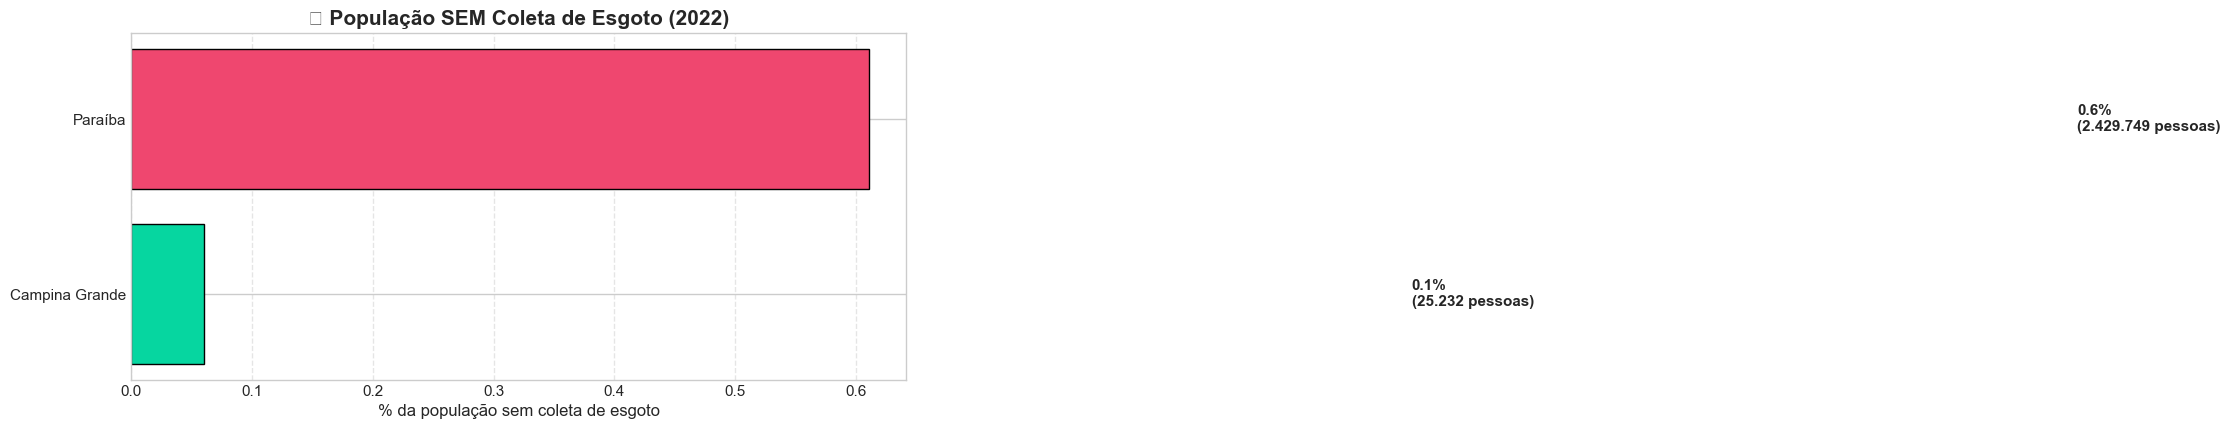


---

## 📈 Estatísticas - SEM Coleta de Esgoto

| Região           | Sem Coleta (%) | Pessoas Impactadas |
|------------------|----------------|---------------------|
| **Paraíba**       | 0.61%         | 2,429,749 |
| **Campina Grande**| 0.06%         | 25,232 |

**📊 Média:** 0.34%  
**📍 Mediana:** 0.34%  
**✨ Moda:** 0.06%

---

## 🔎 Interpretação Enfeitada ✨

> 💩 Este indicador revela a exclusão da população do acesso à coleta de esgoto — algo **essencial para saúde pública e sustentabilidade ambiental.**

- 🔴 A **Paraíba** tem **0.6%** da população sem acesso — o que representa **2,429,749 pessoas**.
- 🟢 Já **Campina Grande** mostra avanço, com apenas **0.1%** ou **25,232 pessoas** sem coleta.
- 💔 A disparidade entre os dois é de **0.6 pontos percentuais**, ou seja, **2,404,517 pessoas a mais** desassistidas no estado em comparação ao município.

📌 **Quanto menor a barra e o número, melhor o cenário.** Menos esgoto sem destino, mais dignidade e saúde.

---


In [44]:
# 🎯 Indicadores a serem usados
indicador_pct = "Parcela da população sem coleta de esgoto"
indicador_abs = "População sem coleta de esgoto"

# Extração dos percentuais (%)
pct_pb = df_pb[df_pb['Indicador'] == indicador_pct]['Valor'].values[0]
pct_cg = df_cg[df_cg['Indicador'] == indicador_pct]['Valor'].values[0]

# Extração dos valores absolutos (pessoas)
abs_pb = df_pb[df_pb['Indicador'] == indicador_abs]['Valor'].values[0]
abs_cg = df_cg[df_cg['Indicador'] == indicador_abs]['Valor'].values[0]

# Conversão
pct_pb = float(str(pct_pb).replace('%', '').replace(',', '.'))
pct_cg = float(str(pct_cg).replace('%', '').replace(',', '.'))

abs_pb = int(str(abs_pb).replace('.', '').replace(',', '').strip())
abs_cg = int(str(abs_cg).replace('.', '').replace(',', '').strip())

# Dados e visual
valores_pct = [pct_pb, pct_cg]
valores_abs = [abs_pb, abs_cg]
labels = ['Paraíba', 'Campina Grande']
cores = ['#ef476f', '#06d6a0']

# --- GRÁFICO ---
fig, ax = plt.subplots(figsize=(10, 4.5))
barras = ax.barh(labels, valores_pct, color=cores, edgecolor='black')

for i, barra in enumerate(barras):
    largura = barra.get_width()
    texto = f"{largura:.1f}%\n({valores_abs[i]:,} pessoas)".replace(',', '.')
    ax.text(largura + 1, barra.get_y() + barra.get_height()/2, texto,
            va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('% da população sem coleta de esgoto', fontsize=12)
ax.set_title('🚫 População SEM Coleta de Esgoto (2022)', fontsize=15, weight='bold')
ax.invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- ESTATÍSTICAS ---
dados = np.array(valores_pct)
media = np.mean(dados)
mediana = np.median(dados)
moda = stats.mode(dados, keepdims=False).mode

# --- DESCRIÇÃO COMPLETA ---
descricao = f"""
---

## 📈 Estatísticas - SEM Coleta de Esgoto

| Região           | Sem Coleta (%) | Pessoas Impactadas |
|------------------|----------------|---------------------|
| **Paraíba**       | {pct_pb:.2f}%         | {abs_pb:,} |
| **Campina Grande**| {pct_cg:.2f}%         | {abs_cg:,} |

**📊 Média:** {media:.2f}%  
**📍 Mediana:** {mediana:.2f}%  
**✨ Moda:** {moda:.2f}%

---

## 🔎 Interpretação Enfeitada ✨

> 💩 Este indicador revela a exclusão da população do acesso à coleta de esgoto — algo **essencial para saúde pública e sustentabilidade ambiental.**

- 🔴 A **Paraíba** tem **{pct_pb:.1f}%** da população sem acesso — o que representa **{abs_pb:,} pessoas**.
- 🟢 Já **Campina Grande** mostra avanço, com apenas **{pct_cg:.1f}%** ou **{abs_cg:,} pessoas** sem coleta.
- 💔 A disparidade entre os dois é de **{pct_pb - pct_cg:.1f} pontos percentuais**, ou seja, **{abs_pb - abs_cg:,} pessoas a mais** desassistidas no estado em comparação ao município.

📌 **Quanto menor a barra e o número, melhor o cenário.** Menos esgoto sem destino, mais dignidade e saúde.

---
"""

from IPython.display import Markdown, display
display(Markdown(descricao))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\564748368.py:39: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  plt.tight_layout()


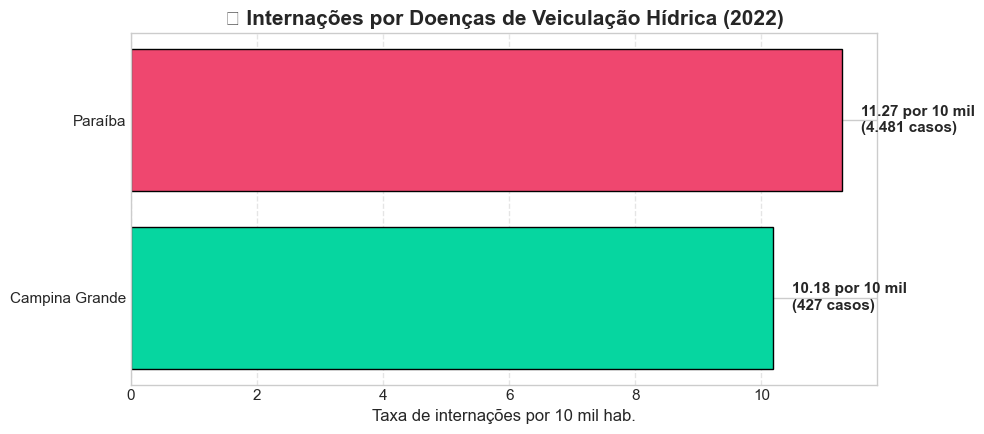


---

## 📈 Internações por Doenças de Veiculação Hídrica

| Região           | Taxa (por 10 mil hab.) | Nº Internações |
|------------------|------------------------|----------------|
| **Paraíba**       | 11.27                   | 4,481         |
| **Campina Grande**| 10.18                   | 427         |

**📊 Média:** 10.73  
**📍 Mediana:** 10.73  
**✨ Moda:** 10.18

---

## 🔎 Interpretação Enfeitada ✨

> 🚨 **Internações por doenças transmitidas pela água suja ou contaminada** são um dos principais sinais de deficiência no saneamento.

- 😷 A **Paraíba** apresentou uma taxa de **11.27** internações por 10 mil habitantes – totalizando **4,481 casos**.
- 🟢 **Campina Grande** teve desempenho melhor, com taxa de **10.18**, e **427 casos**.

💡 A diferença mostra o impacto direto do saneamento na saúde pública. Investir em coleta, esgoto e água tratada **salva vidas e reduz custos com internações**.

📌 Quanto menor a barra, melhor a situação sanitária!

---


In [48]:
# 🎯 Indicadores
indicador_n_abs = "Internações totais por doenças de veiculação hídrica"
indicador_taxa = "Incidência de internações totais por doenças de veiculação hídrica"

# 📥 Extração dos dados
abs_pb = df_pb[df_pb["Indicador"] == indicador_n_abs]["Valor"].values[0]
abs_cg = df_cg[df_cg["Indicador"] == indicador_n_abs]["Valor"].values[0]

taxa_pb = df_pb[df_pb["Indicador"] == indicador_taxa]["Valor"].values[0]
taxa_cg = df_cg[df_cg["Indicador"] == indicador_taxa]["Valor"].values[0]

# 🔁 Conversão
abs_pb = int(str(abs_pb).replace('.', '').replace(',', '').strip())
abs_cg = int(str(abs_cg).replace('.', '').replace(',', '').strip())

taxa_pb = float(str(taxa_pb).replace(',', '.'))
taxa_cg = float(str(taxa_cg).replace(',', '.'))

# 📊 Dados
regioes = ['Paraíba', 'Campina Grande']
valores_taxa = [taxa_pb, taxa_cg]
valores_abs = [abs_pb, abs_cg]
cores = ['#ef476f', '#06d6a0']

# --- GRÁFICO ---
fig, ax = plt.subplots(figsize=(10, 4.5))
barras = ax.barh(regioes, valores_taxa, color=cores, edgecolor='black')

for i, barra in enumerate(barras):
    largura = barra.get_width()
    texto = f"{largura:.2f} por 10 mil\n({valores_abs[i]:,} casos)".replace(',', '.')
    ax.text(largura + 0.3, barra.get_y() + barra.get_height()/2, texto,
            va='center', fontsize=11, fontweight='bold')

ax.set_xlabel('Taxa de internações por 10 mil hab.', fontsize=12)
ax.set_title('🏥 Internações por Doenças de Veiculação Hídrica (2022)', fontsize=15, weight='bold')
ax.invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- ESTATÍSTICAS ---
dados = np.array(valores_taxa)
media = np.mean(dados)
mediana = np.median(dados)
moda = stats.mode(dados, keepdims=False).mode

# --- DESCRIÇÃO ---
descricao = f"""
---

## 📈 Internações por Doenças de Veiculação Hídrica

| Região           | Taxa (por 10 mil hab.) | Nº Internações |
|------------------|------------------------|----------------|
| **Paraíba**       | {taxa_pb:.2f}                   | {abs_pb:,}         |
| **Campina Grande**| {taxa_cg:.2f}                   | {abs_cg:,}         |

**📊 Média:** {media:.2f}  
**📍 Mediana:** {mediana:.2f}  
**✨ Moda:** {moda:.2f}

---

## 🔎 Interpretação Enfeitada ✨

> 🚨 **Internações por doenças transmitidas pela água suja ou contaminada** são um dos principais sinais de deficiência no saneamento.

- 😷 A **Paraíba** apresentou uma taxa de **{taxa_pb:.2f}** internações por 10 mil habitantes – totalizando **{abs_pb:,} casos**.
- 🟢 **Campina Grande** teve desempenho melhor, com taxa de **{taxa_cg:.2f}**, e **{abs_cg:,} casos**.

💡 A diferença mostra o impacto direto do saneamento na saúde pública. Investir em coleta, esgoto e água tratada **salva vidas e reduz custos com internações**.

📌 Quanto menor a barra, melhor a situação sanitária!

---
"""

display(Markdown(descricao))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\1574825709.py:46: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128216 (\N{BLUE BOOK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


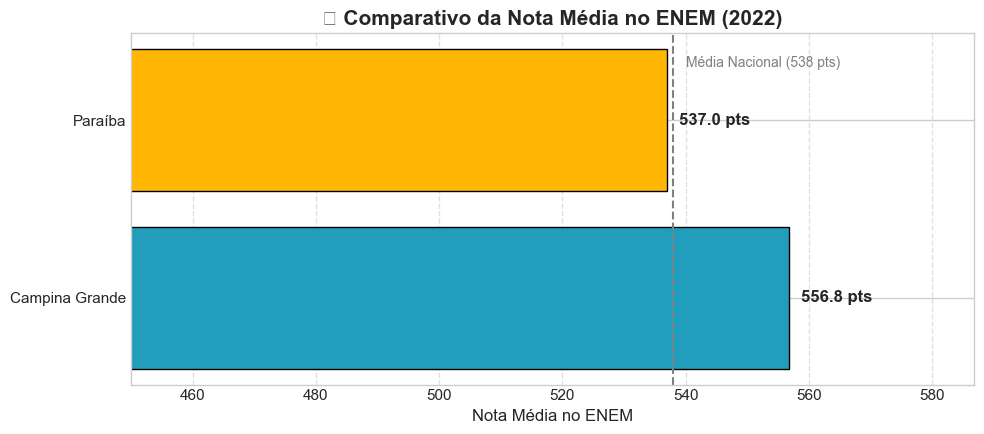


---

## 📘 Estatísticas – Nota Média no ENEM (2022)

| Região           | Nota Média |
|------------------|------------|
| **Paraíba**       | 536.99 pts |
| **Campina Grande**| 556.80 pts |
| **🇧🇷 Média Nacional** | 538.00 pts |

**📊 Média Regional:** 546.89  
**📍 Mediana:** 546.89  
**✨ Moda:** 536.99

---

## 🔍 Interpretação ✨

🎓 O ENEM é uma ferramenta nacional de avaliação, e comparar com a **média do Brasil** ajuda a entender o posicionamento regional:

- 🏅 **Campina Grande** está acima da média nacional, com **556.80 pontos**.
- ⚠️ **Paraíba** está levemente abaixo, com **536.99 pontos**.
- 📈 A linha cinza no gráfico mostra a **média nacional (538 pts)** para facilitar a leitura.

🧠 A média regional entre os dois municípios é de **546.9**, evidenciando **desigualdade local**, mas também **potencial de crescimento**.

📌 Quanto mais à direita da linha cinza (538 pts), **melhor é o desempenho no ENEM**!

---


In [51]:
# --- INDICADOR ---
indicador_enem = "Nota média no ENEM"

# --- VALORES ---
valor_pb = df_pb[df_pb['Indicador'] == indicador_enem]['Valor'].values[0]
valor_cg = df_cg[df_cg['Indicador'] == indicador_enem]['Valor'].values[0]

# --- CONVERSÃO ---
valor_pb = float(str(valor_pb).replace(',', '.'))
valor_cg = float(str(valor_cg).replace(',', '.'))

# --- MÉDIA NACIONAL ---
media_nacional = 538.00

# --- ORGANIZAÇÃO ---
valores = [valor_pb, valor_cg]
labels = ['Paraíba', 'Campina Grande']
cores = ['#ffb703', '#219ebc']

# --- GRÁFICO ---
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from IPython.display import Markdown, display

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 4.5))
barras = ax.barh(labels, valores, color=cores, edgecolor='black')

# Rótulos nas barras
for barra in barras:
    largura = barra.get_width()
    ax.text(largura + 2, barra.get_y() + barra.get_height()/2,
            f'{largura:.1f} pts', va='center', fontsize=12, fontweight='bold')

# Linha de referência da média nacional
ax.axvline(media_nacional, color='gray', linestyle='--', linewidth=1.5)
ax.text(media_nacional + 2, -0.3, 'Média Nacional (538 pts)', fontsize=10, color='gray')

# Estética
ax.set_xlim(450, max(valor_cg, media_nacional) + 30)
ax.set_xlabel('Nota Média no ENEM', fontsize=12)
ax.set_title('📘 Comparativo da Nota Média no ENEM (2022)', fontsize=15, weight='bold')
ax.invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- ESTATÍSTICAS ---
dados = np.array(valores)
media = np.mean(dados)
mediana = np.median(dados)
moda = stats.mode(dados, keepdims=False).mode

# --- MARKDOWN ---
descricao_markdown = f"""
---

## 📘 Estatísticas – Nota Média no ENEM (2022)

| Região           | Nota Média |
|------------------|------------|
| **Paraíba**       | {valor_pb:.2f} pts |
| **Campina Grande**| {valor_cg:.2f} pts |
| **🇧🇷 Média Nacional** | {media_nacional:.2f} pts |

**📊 Média Regional:** {media:.2f}  
**📍 Mediana:** {mediana:.2f}  
**✨ Moda:** {moda:.2f}

---

## 🔍 Interpretação ✨

🎓 O ENEM é uma ferramenta nacional de avaliação, e comparar com a **média do Brasil** ajuda a entender o posicionamento regional:

- 🏅 **Campina Grande** está acima da média nacional, com **{valor_cg:.2f} pontos**.
- ⚠️ **Paraíba** está levemente abaixo, com **{valor_pb:.2f} pontos**.
- 📈 A linha cinza no gráfico mostra a **média nacional (538 pts)** para facilitar a leitura.

🧠 A média regional entre os dois municípios é de **{media:.1f}**, evidenciando **desigualdade local**, mas também **potencial de crescimento**.

📌 Quanto mais à direita da linha cinza (538 pts), **melhor é o desempenho no ENEM**!

---
"""

display(Markdown(descricao_markdown))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\564403401.py:37: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


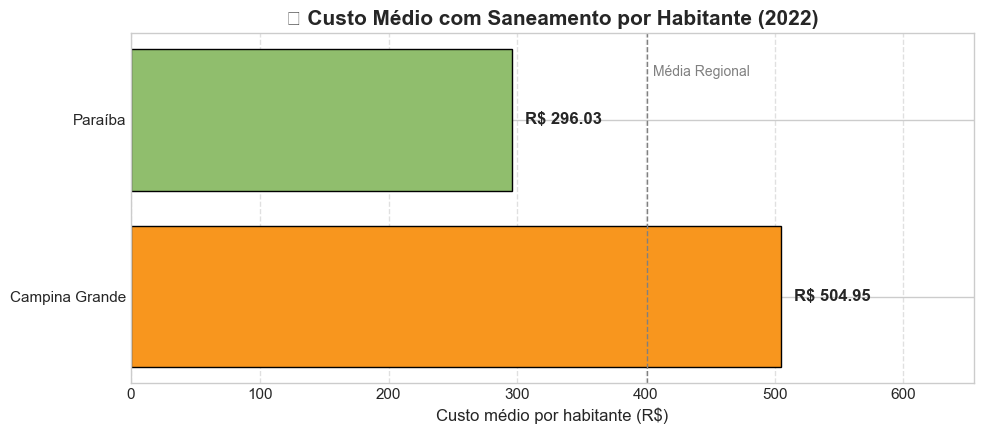


---

## 💰 Custo Médio com Saneamento (por habitante)

| Região           | Despesa Per Capita |
|------------------|---------------------|
| **Paraíba**       | R$ 296.03 |
| **Campina Grande**| R$ 504.95 |

**📊 Média:** R$ 400.49  
**📍 Mediana:** R$ 400.49  
**✨ Moda:** R$ 296.03

---

## 🔍 Interpretação ✨

> 💸 Esse indicador representa quanto, em média, o sistema público **gasta por habitante com serviços de saneamento**.

- 📉 A **Paraíba** investe **R$ 296.03** por pessoa, o que pode refletir **um sistema mais amplo, porém menos intensivo**.
- 📈 Já **Campina Grande** gasta **R$ 504.95**, quase o dobro, sugerindo **maior densidade de serviços ou foco urbano**.
- ⚖️ A média entre os dois é **R$ 400.49**, mas a diferença mostra **desigualdade no nível de investimento** por habitante.

🔎 **Quanto maior o valor investido**, maior tende a ser a qualidade e regularidade dos serviços — **mas também pode indicar maior custo operacional, se não for acompanhado de bons resultados.**

---


In [53]:
# 📚 Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from IPython.display import Markdown, display

# 🎯 Indicadores: Despesa per capita com saneamento
valor_paraiba = 296.03
valor_campina = 504.95
valores = [valor_paraiba, valor_campina]
labels = ['Paraíba', 'Campina Grande']
cores = ['#90be6d', '#f8961e']

# 📊 GRÁFICO HORIZONTAL
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")

fig, ax = plt.subplots(figsize=(10, 4.5))
barras = ax.barh(labels, valores, color=cores, edgecolor='black')

for barra in barras:
    largura = barra.get_width()
    ax.text(largura + 10, barra.get_y() + barra.get_height()/2,
            f'R$ {largura:.2f}', va='center', fontsize=12, fontweight='bold')

# Linha de média (visualmente útil)
media = np.mean(valores)
ax.axvline(x=media, color='gray', linestyle='--', linewidth=1)
ax.text(media + 5, -0.25, 'Média Regional', fontsize=10, color='gray')

ax.set_xlim(0, max(valores) + 150)
ax.set_xlabel('Custo médio por habitante (R$)', fontsize=12)
ax.set_title('💰 Custo Médio com Saneamento por Habitante (2022)', fontsize=15, weight='bold')
ax.invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 📈 Estatísticas
val_arr = np.array(valores)
media = np.mean(val_arr)
mediana = np.median(val_arr)
moda = stats.mode(val_arr, keepdims=False).mode

# 📃 Markdown Explicativo
descricao_md = f"""
---

## 💰 Custo Médio com Saneamento (por habitante)

| Região           | Despesa Per Capita |
|------------------|---------------------|
| **Paraíba**       | R$ {valor_paraiba:.2f} |
| **Campina Grande**| R$ {valor_campina:.2f} |

**📊 Média:** R$ {media:.2f}  
**📍 Mediana:** R$ {mediana:.2f}  
**✨ Moda:** R$ {moda:.2f}

---

## 🔍 Interpretação ✨

> 💸 Esse indicador representa quanto, em média, o sistema público **gasta por habitante com serviços de saneamento**.

- 📉 A **Paraíba** investe **R$ {valor_paraiba:.2f}** por pessoa, o que pode refletir **um sistema mais amplo, porém menos intensivo**.
- 📈 Já **Campina Grande** gasta **R$ {valor_campina:.2f}**, quase o dobro, sugerindo **maior densidade de serviços ou foco urbano**.
- ⚖️ A média entre os dois é **R$ {media:.2f}**, mas a diferença mostra **desigualdade no nível de investimento** por habitante.

🔎 **Quanto maior o valor investido**, maior tende a ser a qualidade e regularidade dos serviços — **mas também pode indicar maior custo operacional, se não for acompanhado de bons resultados.**

---
"""
display(Markdown(descricao_md))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\3618613768.py:58: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


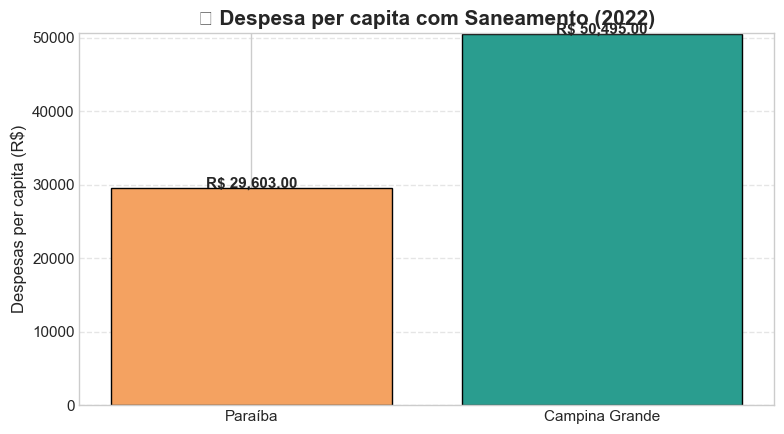


---

## 💸 Investimento Público em Saneamento por Pessoa

| Região           | População       | Despesa per capita | Total investido (R$)    |
|------------------|-----------------|---------------------|--------------------------|
| **Paraíba**       | 3,974,687        | R$ 29,603.00     | R$ 117,662,659,261.00 |
| **Campina Grande**| 419,379        | R$ 50,495.00     | R$ 21,176,542,605.00 |

**📊 Média per capita:** R$ 40,049.00  
**📍 Mediana:** R$ 40,049.00  
**✨ Moda:** R$ 29,603.00

---

## 🔎 Interpretação

- 👥 **Campina Grande** investe cerca de **R$ 50,495.00 por pessoa**, resultando em um investimento total de **R$ 21,176,542,605.00**.
- 🌍 A **Paraíba**, com sua maior população, investe menos por pessoa (**R$ 29,603.00**), mas o total chega a **R$ 117,662,659,261.00**.
- 💡 Isso mostra como **a despesa per capita** pode ser influenciada não apenas pelo total investido, mas também pelo **tamanho da população**.

📌 **Resumo**: Campina Grande tem um investimento mais robusto por habitante, mesmo com um orçamento menor — isso reflete foco e eficiência na aplicação dos recursos locais.

---


In [59]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Markdown, display
from scipy import stats

# 🎨 Estilo visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

# 📥 Leitura dos dados
df_pb = pd.read_excel("Base de dados Fase 02 - Paraíba.xlsx", skiprows=2)
df_cg = pd.read_excel("Base de dados Fase 02 -CAMPINA GRANDE.xlsx", skiprows=2)
df_pb.columns = df_pb.columns.str.strip()
df_cg.columns = df_cg.columns.str.strip()

# 🎯 Indicadores
indicador_despesa = "Despesas per capita com saneamento"
indicador_populacao = "População"

# 🔍 Extração dos dados
despesa_pc_pb = df_pb[df_pb["Indicador"] == indicador_despesa]["Valor"].values[0]
despesa_pc_cg = df_cg[df_cg["Indicador"] == indicador_despesa]["Valor"].values[0]

pop_pb = df_pb[df_pb["Indicador"] == indicador_populacao]["Valor"].values[0]
pop_cg = df_cg[df_cg["Indicador"] == indicador_populacao]["Valor"].values[0]

# 💰 Conversão para float
despesa_pc_pb = float(str(despesa_pc_pb).replace('R$', '').replace('.', '').replace(',', '.'))
despesa_pc_cg = float(str(despesa_pc_cg).replace('R$', '').replace('.', '').replace(',', '.'))

pop_pb = int(str(pop_pb).replace('.', ''))
pop_cg = int(str(pop_cg).replace('.', ''))

# 🧮 Cálculo da despesa total
total_pb = despesa_pc_pb * pop_pb
total_cg = despesa_pc_cg * pop_cg

# 📊 Gráfico comparativo (per capita)
valores = [despesa_pc_pb, despesa_pc_cg]
labels = ['Paraíba', 'Campina Grande']
cores = ['#f4a261', '#2a9d8f']

fig, ax = plt.subplots(figsize=(8, 4.5))
barras = ax.bar(labels, valores, color=cores, edgecolor='black')

for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 10,
            f'R$ {altura:,.2f}', ha='center', fontsize=11, fontweight='bold')

ax.set_ylabel('Despesas per capita (R$)', fontsize=12)
ax.set_title('💰 Despesa per capita com Saneamento (2022)', fontsize=15, fontweight='bold')
plt.ylim(0, max(valores) + 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 📈 Estatísticas
media = np.mean(valores)
mediana = np.median(valores)
moda = float(stats.mode(valores, keepdims=False).mode)

# 📝 Markdown explicativo
markdown_texto = f"""
---

## 💸 Investimento Público em Saneamento por Pessoa

| Região           | População       | Despesa per capita | Total investido (R$)    |
|------------------|-----------------|---------------------|--------------------------|
| **Paraíba**       | {pop_pb:,}        | R$ {despesa_pc_pb:,.2f}     | R$ {total_pb:,.2f} |
| **Campina Grande**| {pop_cg:,}        | R$ {despesa_pc_cg:,.2f}     | R$ {total_cg:,.2f} |

**📊 Média per capita:** R$ {media:,.2f}  
**📍 Mediana:** R$ {mediana:,.2f}  
**✨ Moda:** R$ {moda:,.2f}

---

## 🔎 Interpretação

- 👥 **Campina Grande** investe cerca de **R$ {despesa_pc_cg:,.2f} por pessoa**, resultando em um investimento total de **R$ {total_cg:,.2f}**.
- 🌍 A **Paraíba**, com sua maior população, investe menos por pessoa (**R$ {despesa_pc_pb:,.2f}**), mas o total chega a **R$ {total_pb:,.2f}**.
- 💡 Isso mostra como **a despesa per capita** pode ser influenciada não apenas pelo total investido, mas também pelo **tamanho da população**.

📌 **Resumo**: Campina Grande tem um investimento mais robusto por habitante, mesmo com um orçamento menor — isso reflete foco e eficiência na aplicação dos recursos locais.

---
"""

display(Markdown(markdown_texto))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\991619307.py:58: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127973 (\N{HOSPITAL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


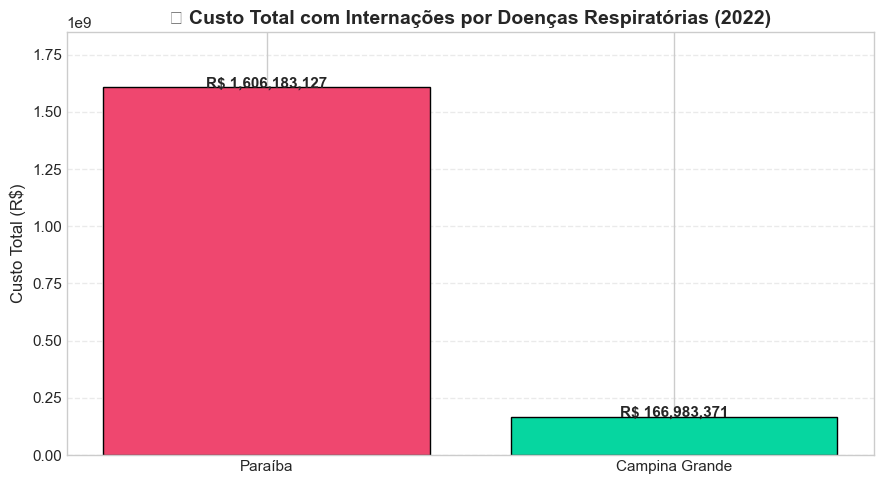


---

## 💰 Custo com Internações por Doenças Respiratórias

| Região           | População | Custo Total (R$)     | Custo per capita (R$) |
|------------------|-----------|-----------------------|------------------------|
| **Paraíba**       | 3,974,687     | R$ 1,606,183,127.00        | R$ 404.10 |
| **Campina Grande**| 419,379       | R$ 166,983,371.00        | R$ 398.17 |

**📊 Média dos custos totais:** R$ 886,583,249.00  
**📍 Mediana:** R$ 886,583,249.00  
**✨ Moda:** R$ 166,983,371.00

---

## 🔎 Interpretação

- 💵 A **Paraíba**, como estado, teve um custo **total** muito maior: **R$ 1,606,183,127.00**, enquanto **Campina Grande** teve **R$ 166,983,371.00**.
- 👥 Porém, analisando o **custo por habitante**, vemos que:
  - **Campina Grande:** R$ 398.17 por pessoa
  - **Paraíba:** R$ 404.10 por pessoa
- ⚖️ Isso mostra que, proporcionalmente, **Campina Grande investiu mais por pessoa** em saúde respiratória.
- 🧠 Esses dados ajudam a entender como recursos são distribuídos, independentemente do tamanho da população.

📌 **Resumo**: A Paraíba tem o maior gasto absoluto, mas Campina Grande se destaca no investimento per capita.

---


In [61]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from IPython.display import Markdown, display

# 🎨 Estilo visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

# 📥 Leitura dos dados
df_pb = pd.read_excel("Base de dados Fase 02 - Paraíba.xlsx", skiprows=2)
df_cg = pd.read_excel("Base de dados Fase 02 -CAMPINA GRANDE.xlsx", skiprows=2)
df_pb.columns = df_pb.columns.str.strip()
df_cg.columns = df_cg.columns.str.strip()

# 🎯 Indicador desejado
indicador = "Custo das internações por doenças respiratórias"
pop_indicador = "População"

# 🔍 Extração dos valores
custo_pb = df_pb[df_pb["Indicador"] == indicador]["Valor"].values[0]
custo_cg = df_cg[df_cg["Indicador"] == indicador]["Valor"].values[0]

pop_pb = df_pb[df_pb["Indicador"] == pop_indicador]["Valor"].values[0]
pop_cg = df_cg[df_cg["Indicador"] == pop_indicador]["Valor"].values[0]

# 💸 Conversão para float
custo_pb = float(str(custo_pb).replace('R$', '').replace('.', '').replace(',', '.'))
custo_cg = float(str(custo_cg).replace('R$', '').replace('.', '').replace(',', '.'))

pop_pb = int(str(pop_pb).replace('.', '').strip())
pop_cg = int(str(pop_cg).replace('.', '').strip())

# 💰 Cálculo do custo per capita com internações por doenças respiratórias
per_capita_pb = custo_pb / pop_pb
per_capita_cg = custo_cg / pop_cg

# 📊 Gráfico comparativo
valores = [custo_pb, custo_cg]
labels = ['Paraíba', 'Campina Grande']
cores = ['#ef476f', '#06d6a0']

fig, ax = plt.subplots(figsize=(9, 5))
barras = ax.bar(labels, valores, color=cores, edgecolor='black')

for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 200000,
            f'R$ {altura:,.0f}', ha='center', fontsize=11, fontweight='bold')

ax.set_ylabel('Custo Total (R$)', fontsize=12)
ax.set_title('🏥 Custo Total com Internações por Doenças Respiratórias (2022)', fontsize=14, fontweight='bold')
plt.ylim(0, max(valores) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 📈 Estatísticas
media = np.mean(valores)
mediana = np.median(valores)
moda = float(stats.mode(valores, keepdims=False).mode)

# 📝 Descrição enfeitada com Markdown
texto = f"""
---

## 💰 Custo com Internações por Doenças Respiratórias

| Região           | População | Custo Total (R$)     | Custo per capita (R$) |
|------------------|-----------|-----------------------|------------------------|
| **Paraíba**       | {pop_pb:,}     | R$ {custo_pb:,.2f}        | R$ {per_capita_pb:.2f} |
| **Campina Grande**| {pop_cg:,}       | R$ {custo_cg:,.2f}        | R$ {per_capita_cg:.2f} |

**📊 Média dos custos totais:** R$ {media:,.2f}  
**📍 Mediana:** R$ {mediana:,.2f}  
**✨ Moda:** R$ {moda:,.2f}

---

## 🔎 Interpretação

- 💵 A **Paraíba**, como estado, teve um custo **total** muito maior: **R$ {custo_pb:,.2f}**, enquanto **Campina Grande** teve **R$ {custo_cg:,.2f}**.
- 👥 Porém, analisando o **custo por habitante**, vemos que:
  - **Campina Grande:** R$ {per_capita_cg:.2f} por pessoa
  - **Paraíba:** R$ {per_capita_pb:.2f} por pessoa
- ⚖️ Isso mostra que, proporcionalmente, **Campina Grande investiu mais por pessoa** em saúde respiratória.
- 🧠 Esses dados ajudam a entender como recursos são distribuídos, independentemente do tamanho da população.

📌 **Resumo**: A Paraíba tem o maior gasto absoluto, mas Campina Grande se destaca no investimento per capita.

---
"""
display(Markdown(texto))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\940828428.py:46: UserWarning: Glyph 128688 (\N{POTABLE WATER SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128688 (\N{POTABLE WATER SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


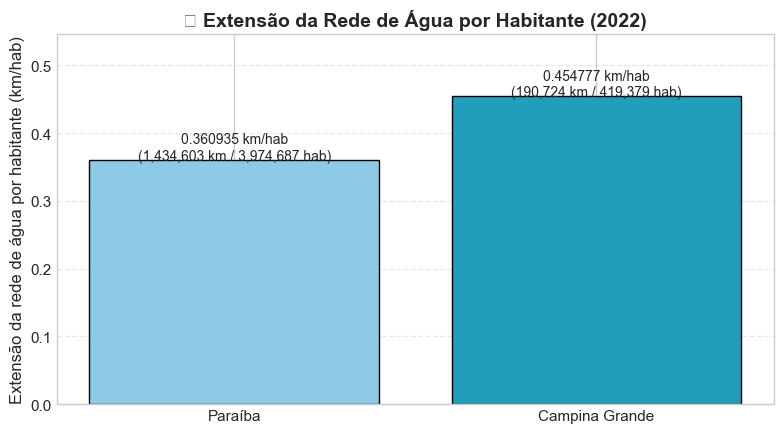


---

## 🌐 Comparativo: Extensão da Rede de Água por Habitante

| Região           | Extensão (km) | População | km por habitante |
|------------------|---------------|------------|------------------|
| **Paraíba**       | 1,434,603 km | 3,974,687 | 0.360935 |
| **Campina Grande**| 190,724 km | 419,379 | 0.454777 |

---

## 🔎 Interpretação

- 🚰 Este indicador mostra **quantos quilômetros de rede de água existem por habitante**.
- 🏙️ **Campina Grande**, mesmo sendo menor, possui uma **maior densidade de rede** proporcional à população.
- 🗺️ Já a **Paraíba** apresenta **menor capilaridade**, o que pode indicar áreas rurais ou regiões com menor cobertura.

📌 **Resumo**: quanto **maior o valor**, melhor é a infraestrutura hídrica por pessoa.

---


In [63]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Markdown, display

# 🎨 Estilo visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# 📥 Leitura e limpeza
df_pb = pd.read_excel("Base de dados Fase 02 - Paraíba.xlsx", skiprows=2)
df_cg = pd.read_excel("Base de dados Fase 02 -CAMPINA GRANDE.xlsx", skiprows=2)
df_pb.columns = df_pb.columns.str.strip()
df_cg.columns = df_cg.columns.str.strip()

# 🔍 Indicadores
populacao_pb = int(str(df_pb[df_pb['Indicador'] == 'População']['Valor'].values[0]).replace('.', ''))
populacao_cg = int(str(df_cg[df_cg['Indicador'] == 'População']['Valor'].values[0]).replace('.', ''))

extensao_agua_pb = float(str(df_pb[df_pb['Indicador'] == 'Extensão da rede de água']['Valor'].values[0]).replace('.', '').replace(',', '.'))
extensao_agua_cg = float(str(df_cg[df_cg['Indicador'] == 'Extensão da rede de água']['Valor'].values[0]).replace('.', '').replace(',', '.'))

# 🧮 Cálculo: km por habitante
km_hab_pb = extensao_agua_pb / populacao_pb
km_hab_cg = extensao_agua_cg / populacao_cg

valores = [km_hab_pb, km_hab_cg]
labels = ['Paraíba', 'Campina Grande']

# 📊 Gráfico
fig, ax = plt.subplots(figsize=(8, 4.5))
barras = ax.bar(labels, valores, color=['#8ecae6', '#219ebc'], edgecolor='black')

for barra, valor_total, pop in zip(barras, [extensao_agua_pb, extensao_agua_cg], [populacao_pb, populacao_cg]):
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 0.00001,
            f'{altura:.6f} km/hab\n({valor_total:,.0f} km / {pop:,} hab)',
            ha='center', fontsize=10)

ax.set_ylabel('Extensão da rede de água por habitante (km/hab)', fontsize=12)
ax.set_title('🚰 Extensão da Rede de Água por Habitante (2022)', fontsize=14, weight='bold')
plt.ylim(0, max(valores)*1.2)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 📝 Markdown descritivo
texto = f"""
---

## 🌐 Comparativo: Extensão da Rede de Água por Habitante

| Região           | Extensão (km) | População | km por habitante |
|------------------|---------------|------------|------------------|
| **Paraíba**       | {extensao_agua_pb:,.0f} km | {populacao_pb:,} | {km_hab_pb:.6f} |
| **Campina Grande**| {extensao_agua_cg:,.0f} km | {populacao_cg:,} | {km_hab_cg:.6f} |

---

## 🔎 Interpretação

- 🚰 Este indicador mostra **quantos quilômetros de rede de água existem por habitante**.
- 🏙️ **Campina Grande**, mesmo sendo menor, possui uma **maior densidade de rede** proporcional à população.
- 🗺️ Já a **Paraíba** apresenta **menor capilaridade**, o que pode indicar áreas rurais ou regiões com menor cobertura.

📌 **Resumo**: quanto **maior o valor**, melhor é a infraestrutura hídrica por pessoa.

---
"""
display(Markdown(texto))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\1011210008.py:52: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


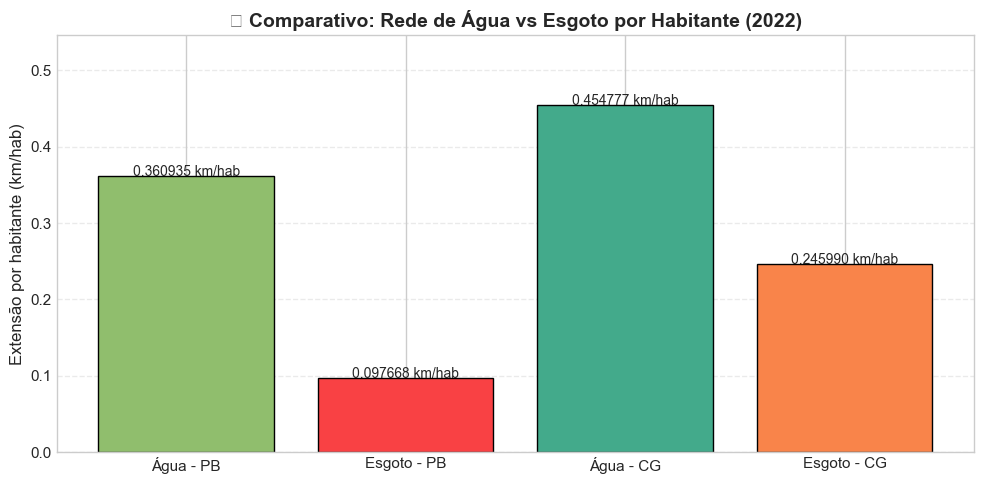


---

## 🚰 Extensão por Habitante – Água vs Esgoto

| Região            | Tipo     | Extensão (km) | População | km por habitante |
|-------------------|----------|----------------|------------|------------------|
| **Paraíba**        | Água     | 1,434,603 km | 3,974,687 | 0.360935 |
| **Paraíba**        | Esgoto   | 388,199 km | 3,974,687 | 0.097668 |
| **Campina Grande** | Água     | 190,724 km | 419,379 | 0.454777 |
| **Campina Grande** | Esgoto   | 103,163 km | 419,379 | 0.245990 |

---

## 🔎 Interpretação

- 📊 A extensão da **rede de água** por habitante é maior que a de esgoto em ambas as regiões.
- 🏙️ **Campina Grande** continua se destacando com melhor cobertura proporcional, tanto em água quanto em esgoto.
- ⚠️ A diferença entre **água e esgoto** evidencia desafios no saneamento, principalmente para o estado da Paraíba.
- 💧 Infraestrutura hídrica capilar tende a ser mais consolidada do que a de esgotamento sanitário.

📌 **Resumo**: embora haja bons índices de água por habitante, a rede de esgoto ainda precisa avançar para equilibrar a infraestrutura pública.

---


In [65]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Markdown, display

# 🎨 Estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# 📥 Leitura e limpeza
df_pb = pd.read_excel("Base de dados Fase 02 - Paraíba.xlsx", skiprows=2)
df_cg = pd.read_excel("Base de dados Fase 02 -CAMPINA GRANDE.xlsx", skiprows=2)
df_pb.columns = df_pb.columns.str.strip()
df_cg.columns = df_cg.columns.str.strip()

# 🔍 População
pop_pb = int(str(df_pb[df_pb["Indicador"] == "População"]["Valor"].values[0]).replace(".", ""))
pop_cg = int(str(df_cg[df_cg["Indicador"] == "População"]["Valor"].values[0]).replace(".", ""))

# 🔍 Extensão das redes
rede_agua_pb = float(str(df_pb[df_pb["Indicador"] == "Extensão da rede de água"]["Valor"].values[0]).replace(".", "").replace(",", "."))
rede_esgoto_pb = float(str(df_pb[df_pb["Indicador"] == "Extensão da rede de esgoto"]["Valor"].values[0]).replace(".", "").replace(",", "."))

rede_agua_cg = float(str(df_cg[df_cg["Indicador"] == "Extensão da rede de água"]["Valor"].values[0]).replace(".", "").replace(",", "."))
rede_esgoto_cg = float(str(df_cg[df_cg["Indicador"] == "Extensão da rede de esgoto"]["Valor"].values[0]).replace(".", "").replace(",", "."))

# 🧮 Cálculo km por habitante
agua_pb_km_hab = rede_agua_pb / pop_pb
esgoto_pb_km_hab = rede_esgoto_pb / pop_pb
agua_cg_km_hab = rede_agua_cg / pop_cg
esgoto_cg_km_hab = rede_esgoto_cg / pop_cg

# 📊 Gráfico
labels = ['Água - PB', 'Esgoto - PB', 'Água - CG', 'Esgoto - CG']
valores = [agua_pb_km_hab, esgoto_pb_km_hab, agua_cg_km_hab, esgoto_cg_km_hab]
cores = ['#90be6d', '#f94144', '#43aa8b', '#f9844a']

fig, ax = plt.subplots(figsize=(10, 5))
barras = ax.bar(labels, valores, color=cores, edgecolor='black')

for barra, valor in zip(barras, valores):
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 0.00001,
            f'{valor:.6f} km/hab', ha='center', fontsize=10)

ax.set_ylabel('Extensão por habitante (km/hab)', fontsize=12)
ax.set_title('🔄 Comparativo: Rede de Água vs Esgoto por Habitante (2022)', fontsize=14, weight='bold')
plt.ylim(0, max(valores)*1.2)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 📝 Markdown explicativo
texto_md = f"""
---

## 🚰 Extensão por Habitante – Água vs Esgoto

| Região            | Tipo     | Extensão (km) | População | km por habitante |
|-------------------|----------|----------------|------------|------------------|
| **Paraíba**        | Água     | {rede_agua_pb:,.0f} km | {pop_pb:,} | {agua_pb_km_hab:.6f} |
| **Paraíba**        | Esgoto   | {rede_esgoto_pb:,.0f} km | {pop_pb:,} | {esgoto_pb_km_hab:.6f} |
| **Campina Grande** | Água     | {rede_agua_cg:,.0f} km | {pop_cg:,} | {agua_cg_km_hab:.6f} |
| **Campina Grande** | Esgoto   | {rede_esgoto_cg:,.0f} km | {pop_cg:,} | {esgoto_cg_km_hab:.6f} |

---

## 🔎 Interpretação

- 📊 A extensão da **rede de água** por habitante é maior que a de esgoto em ambas as regiões.
- 🏙️ **Campina Grande** continua se destacando com melhor cobertura proporcional, tanto em água quanto em esgoto.
- ⚠️ A diferença entre **água e esgoto** evidencia desafios no saneamento, principalmente para o estado da Paraíba.
- 💧 Infraestrutura hídrica capilar tende a ser mais consolidada do que a de esgotamento sanitário.

📌 **Resumo**: embora haja bons índices de água por habitante, a rede de esgoto ainda precisa avançar para equilibrar a infraestrutura pública.

---
"""
display(Markdown(texto_md))


C:\Users\iagor\AppData\Local\Temp\ipykernel_26400\3042653276.py:58: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\iagor\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


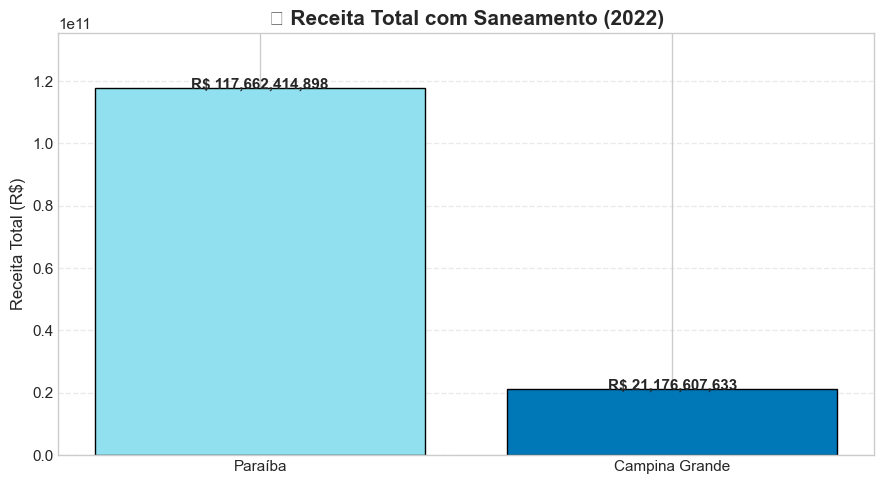


---

## 💸 Receita Total com Saneamento

| Região           | Receita Total (R$) | População | Receita Per Capita (R$) |
|------------------|--------------------|------------|---------------------------|
| **Paraíba**       | R$ 117,662,414,898.00 | 3,974,687 | R$ 29,602.94 |
| **Campina Grande**| R$ 21,176,607,633.00 | 419,379 | R$ 50,495.16 |

**📊 Média da Receita Total:** R$ 69,419,511,265.50  
**📍 Mediana:** R$ 69,419,511,265.50  
**✨ Moda:** R$ 21,176,607,633.00

---

## 🔎 Interpretação Econômica

- 💼 A **Paraíba**, por ser o estado inteiro, naturalmente arrecada mais em termos absolutos (R$ 117,662,414,898).
- 💰 Porém, ao analisarmos **per capita**, **Campina Grande** arrecada **mais por pessoa**:  
  - **Campina Grande:** R$ 50,495.16 por habitante  
  - **Paraíba:** R$ 29,602.94 por habitante

✔️ Isso indica maior eficiência ou concentração de serviços no município.

📌 **Resumo:**  
Campina Grande demonstra **maior capacidade de gerar receita proporcionalmente**, enquanto a Paraíba tem maior volume total, como esperado.

---


In [67]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from IPython.display import Markdown, display

# 🎨 Estilo visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

# 📥 Leitura dos dados
df_pb = pd.read_excel("Base de dados Fase 02 - Paraíba.xlsx", skiprows=2)
df_cg = pd.read_excel("Base de dados Fase 02 -CAMPINA GRANDE.xlsx", skiprows=2)
df_pb.columns = df_pb.columns.str.strip()
df_cg.columns = df_cg.columns.str.strip()

# 🔍 Indicador: Receita direta e indireta total
indicador = "Receita direta e indireta total a preços de 2022"
pop_indicador = "População"

# 📊 Extração dos valores
receita_pb = df_pb[df_pb["Indicador"] == indicador]["Valor"].values[0]
receita_cg = df_cg[df_cg["Indicador"] == indicador]["Valor"].values[0]
pop_pb = df_pb[df_pb["Indicador"] == pop_indicador]["Valor"].values[0]
pop_cg = df_cg[df_cg["Indicador"] == pop_indicador]["Valor"].values[0]

# 💸 Conversão de receita
receita_pb = float(str(receita_pb).replace('R$', '').replace('.', '').replace(',', '.'))
receita_cg = float(str(receita_cg).replace('R$', '').replace('.', '').replace(',', '.'))

# 👥 Conversão de população
pop_pb = int(str(pop_pb).replace('.', '').replace(',', ''))
pop_cg = int(str(pop_cg).replace('.', '').replace(',', ''))

# 💰 Receita per capita
percap_pb = receita_pb / pop_pb
percap_cg = receita_cg / pop_cg

# 📊 Gráfico
labels = ['Paraíba', 'Campina Grande']
valores = [receita_pb, receita_cg]
cores = ['#90e0ef', '#0077b6']

fig, ax = plt.subplots(figsize=(9, 5))
barras = ax.bar(labels, valores, color=cores, edgecolor='black')

for barra in barras:
    altura = barra.get_height()
    ax.text(barra.get_x() + barra.get_width()/2, altura + 1e7,
            f'R$ {altura:,.0f}', ha='center', fontsize=11, fontweight='bold')

ax.set_ylabel('Receita Total (R$)', fontsize=12)
ax.set_title('💰 Receita Total com Saneamento (2022)', fontsize=15, fontweight='bold')
plt.ylim(0, max(valores)*1.15)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# 📈 Estatísticas
val_arr = np.array(valores)
media = np.mean(val_arr)
mediana = np.median(val_arr)
moda = float(stats.mode(val_arr, keepdims=False).mode)

# 📝 Markdown descritivo
markdown_texto = f"""
---

## 💸 Receita Total com Saneamento

| Região           | Receita Total (R$) | População | Receita Per Capita (R$) |
|------------------|--------------------|------------|---------------------------|
| **Paraíba**       | R$ {receita_pb:,.2f} | {pop_pb:,} | R$ {percap_pb:,.2f} |
| **Campina Grande**| R$ {receita_cg:,.2f} | {pop_cg:,} | R$ {percap_cg:,.2f} |

**📊 Média da Receita Total:** R$ {media:,.2f}  
**📍 Mediana:** R$ {mediana:,.2f}  
**✨ Moda:** R$ {moda:,.2f}

---

## 🔎 Interpretação Econômica

- 💼 A **Paraíba**, por ser o estado inteiro, naturalmente arrecada mais em termos absolutos (R$ {receita_pb:,.0f}).
- 💰 Porém, ao analisarmos **per capita**, **Campina Grande** arrecada **mais por pessoa**:  
  - **Campina Grande:** R$ {percap_cg:,.2f} por habitante  
  - **Paraíba:** R$ {percap_pb:,.2f} por habitante

✔️ Isso indica maior eficiência ou concentração de serviços no município.

📌 **Resumo:**  
Campina Grande demonstra **maior capacidade de gerar receita proporcionalmente**, enquanto a Paraíba tem maior volume total, como esperado.

---
"""

display(Markdown(markdown_texto))
